In [109]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import missingno as msno
# import graphviz


In [110]:
%matplotlib inline
pd.set_option('float_format', '{:.2f}'.format)
plt.rcParams['figure.dpi'] = 400

In [111]:
# Dataset familia
familia = pd.read_csv('base_amostra_familia_201812.csv', 
                      sep=';', 
                      encoding='utf-8',
                      low_memory=False,
                      )

In [112]:
# Dataset Pessoa

pessoas = pd.read_csv('base_amostra_pessoa_201812.csv',
                      sep=';',
                      encoding='utf-8',
                      low_memory=False,
                        )

In [113]:
familia.head(3)

,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
0,3205002,2,2,1.00,2018-06-28,2018-10-02,244.00,2018-06-28,1.00,1.00,...,2.00,2.00,NaN,NaN,CRAS DE SERRA SEDE,32050034575.00,0.00,0,5,550256458545518
1,3205101,2,2,3.00,2018-08-27,2018-11-29,60.00,2018-11-29,1.00,1.00,...,2.00,2.00,NaN,NaN,CRAS VIANA,32051030269.00,0.00,1,5,550355704647837
2,3201308,2,2,4.00,2018-02-23,2018-02-27,937.00,2018-02-23,1.00,1.00,...,2.00,2.00,NaN,NaN,CRAS IV ALTO MUCURI,32013002407.00,0.00,0,1,550259704488172


In [114]:
print(familia['cd_ibge'].nunique())
familia['cd_ibge'].dtype

5534


dtype('int64')

In [115]:
municipios = [
'Alvorada',
'Araricá',
'Arroio dos Ratos',
'Cachoeirinha',
'Campo Bom',
'Canoas',
'Capela de Santana',
'Charqueadas',
'Dois Irmãos',
'Eldorado do Sul',
'Esteio',
'Estância Velha',
'Glorinha',
'Gravataí',
'Guaíba',
'Igrejinha',
'Ivoti',
'Montenegro',
'Nova Hartz',
'Nova Santa Rita',
'Novo Hamburgo',
'Parobé',
'Porto Alegre',
'Portão',
'Rolante',
'Santo Antônio da Patrulha',
'Sapiranga',
'Sapucaia do Sul',
'São Jerônimo',
'São Leopoldo',
'São Sebastião do Caí',
'Taquara',
'Triunfo',
'Viamão']

codigos_regiao_metropolitana = [4300604,4300877,4301107,4303103,4303905,4304606,4304689,4305355,4306403,4306767,4307708,4307609,
                                4309050,4309209,4309308,4310108,4310801,4312401,4313060,4313375,4313409,4314050,4314902,4314803,
                                4316006,4317608,4319901,4320008,4318408,4318705,4319505,4321204,4322004,4323002]

In [116]:
# Crie um dicionário com a lista municípios e seus respectivos códigos IBGE em códigos_regiao_metropolitana
municipios_codigos = dict(zip(municipios, codigos_regiao_metropolitana))
municipios_codigos

{'Alvorada': 4300604,
 'Araricá': 4300877,
 'Arroio dos Ratos': 4301107,
 'Cachoeirinha': 4303103,
 'Campo Bom': 4303905,
 'Canoas': 4304606,
 'Capela de Santana': 4304689,
 'Charqueadas': 4305355,
 'Dois Irmãos': 4306403,
 'Eldorado do Sul': 4306767,
 'Esteio': 4307708,
 'Estância Velha': 4307609,
 'Glorinha': 4309050,
 'Gravataí': 4309209,
 'Guaíba': 4309308,
 'Igrejinha': 4310108,
 'Ivoti': 4310801,
 'Montenegro': 4312401,
 'Nova Hartz': 4313060,
 'Nova Santa Rita': 4313375,
 'Novo Hamburgo': 4313409,
 'Parobé': 4314050,
 'Porto Alegre': 4314902,
 'Portão': 4314803,
 'Rolante': 4316006,
 'Santo Antônio da Patrulha': 4317608,
 'Sapiranga': 4319901,
 'Sapucaia do Sul': 4320008,
 'São Jerônimo': 4318408,
 'São Leopoldo': 4318705,
 'São Sebastião do Caí': 4319505,
 'Taquara': 4321204,
 'Triunfo': 4322004,
 'Viamão': 4323002}

In [117]:
# Filtrando os códigos da região metropolitana para família
familia = familia.query("cd_ibge in @municipios_codigos.values()")

In [118]:
# Filtrando os códigos da região metropolitana para pessoas
pessoas = pessoas.query("cd_ibge in @municipios_codigos.values()")

In [119]:
# Dimensões do dataframe
familia.shape

(55163, 31)

In [120]:
pessoas.shape

(139909, 35)

In [121]:
familia

,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
49154,4314803,1,2,59310.00,2013-03-06,2018-10-01,58.00,2017-07-13,2.00,1.00,...,2.00,1.00,POSTO CENTRAL PORTAO,2700913.00,CRAS,43148036091.00,0.00,1,4,550267492697038
49155,4323002,2,2,59311.00,2013-11-20,2018-10-01,370.00,2017-08-24,1.00,1.00,...,2.00,2.00,NaN,NaN,CRAS MONTE ALEGRE,43230004325.00,0.00,0,2,550223828911994
49156,4312401,1,2,59312.00,2018-08-09,2018-10-15,0.00,2018-10-15,1.00,1.00,...,2.00,2.00,POSTO TIMBAUVA,2227118.00,NaN,NaN,0.00,1,2,550267492697038
49157,4323002,2,2,59313.00,2014-06-18,2018-10-01,28.00,2018-08-10,1.00,1.00,...,2.00,2.00,NaN,NaN,CRAS MONTE ALEGRE,43230004325.00,306.00,1,3,550223828911994
49158,4318705,2,2,59314.00,2015-10-08,2015-10-08,50.00,2015-10-08,1.00,1.00,...,2.00,2.00,NaN,NaN,CRAS CENTRO,43187004366.00,0.00,0,2,550245146328323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936580,4314902,2,1,4396746.00,2017-12-15,2018-10-01,0.00,2017-12-15,1.00,1.00,...,2.00,2.00,UBS VILA GAUCHA,2264994.00,CRAS CRUZEIRO,43149030344.00,0.00,0,1,550245146328323
3936581,4314902,2,1,4396747.00,2011-12-20,2018-10-01,0.00,2018-03-28,1.00,1.00,...,2.00,2.00,UNIDADE DE SAUDE CHACARA DA FUMACA,2264870.00,CRAS NORDESTE,43149030261.00,0.00,0,4,550245146328323
3936582,4314902,2,1,4396748.00,2018-05-09,2018-10-02,0.00,2018-05-09,NaN,NaN,...,2.00,2.00,UNIDADE DE SAUDE SANTA MARTA,6883354.00,CRAS CENTRO,43149015586.00,0.00,1,1,550245146328323
3936583,4314902,2,1,4396749.00,2012-03-21,2018-10-01,416.00,2018-05-25,1.00,1.00,...,2.00,2.00,UNIDADE DE SAUDE VILA CRUZEIRO,2265036.00,CRAS CRUZEIRO,43149030344.00,0.00,0,2,550245146328323


In [122]:
# Informações sobre o dataframe
familia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55163 entries, 49154 to 3936584
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cd_ibge                        55163 non-null  int64  
 1   estrato                        55163 non-null  int64  
 2   classf                         55163 non-null  int64  
 3   id_familia                     55163 non-null  float64
 4   dat_cadastramento_fam          55163 non-null  object 
 5   dat_alteracao_fam              55163 non-null  object 
 6   vlr_renda_media_fam            55162 non-null  float64
 7   dat_atualizacao_familia        55163 non-null  object 
 8   cod_local_domic_fam            54604 non-null  float64
 9   cod_especie_domic_fam          54604 non-null  float64
 10  qtd_comodos_domic_fam          52815 non-null  float64
 11  qtd_comodos_dormitorio_fam     52826 non-null  float64
 12  cod_material_piso_fam          52836 non-null

In [123]:
# Visualizando as colunas
familia.columns

Index(['cd_ibge', 'estrato', 'classf', 'id_familia', 'dat_cadastramento_fam',
       'dat_alteracao_fam', 'vlr_renda_media_fam', 'dat_atualizacao_familia',
       'cod_local_domic_fam', 'cod_especie_domic_fam', 'qtd_comodos_domic_fam',
       'qtd_comodos_dormitorio_fam', 'cod_material_piso_fam',
       'cod_material_domic_fam', 'cod_agua_canalizada_fam',
       'cod_abaste_agua_domic_fam', 'cod_banheiro_domic_fam',
       'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
       'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'nom_estab_assist_saude_fam', 'cod_eas_fam', 'nom_centro_assist_fam',
       'cod_centro_assist_fam', 'ind_parc_mds_fam', 'marc_pbf', 'qtde_pessoas',
       'peso.fam'],
      dtype='object')

In [124]:
# Tabela das colunas
tabela_colunas_familias = pd.DataFrame(familia.columns, columns=['Variáveis das Famílias antes da limpeza'])
tabela_colunas_familias

,Variáveis das Famílias antes da limpeza
0,cd_ibge
1,estrato
2,classf
3,id_familia
4,dat_cadastramento_fam
5,dat_alteracao_fam
6,vlr_renda_media_fam
7,dat_atualizacao_familia
8,cod_local_domic_fam
9,cod_especie_domic_fam


In [125]:
# Tabela das colunas das pessoas
tabela_colunas_pessoas = pd.DataFrame(pessoas.columns, columns=['Variáveis das Pessoas antes da limpeza'])
tabela_colunas_pessoas

,Variáveis das Pessoas antes da limpeza
0,cd_ibge
1,estrato
2,classf
3,id_familia
4,id_pessoa
5,cod_sexo_pessoa
6,idade
7,cod_parentesco_rf_pessoa
8,cod_raca_cor_pessoa
9,cod_local_nascimento_pessoa


In [126]:
familia['cd_ibge'].nunique()

34

In [127]:
# Excluir as colunas não utilizadas
familia.drop(['estrato', 
              'classf', 
              'dat_cadastramento_fam',
              'dat_alteracao_fam', 
              'dat_atualizacao_familia',
              'cod_local_domic_fam', 
              'nom_estab_assist_saude_fam', 
              'cod_eas_fam', 
              'nom_centro_assist_fam',
              'cod_centro_assist_fam',
              'ind_parc_mds_fam', 
              'peso.fam',
              'qtde_pessoas',
              ], inplace=True, axis=1)


In [128]:
pessoas.drop(['cod_local_nascimento_pessoa',
              'cod_parentesco_rf_pessoa',
              'cod_certidao_registrada_pessoa',
              'cod_ano_serie_frequenta_memb',
              'cod_curso_frequentou_pessoa_memb',
              'cod_ano_serie_frequentou_memb',             
              'cod_concluiu_frequentou_memb',
              'cod_trabalhou_memb',
              'cod_afastado_trab_memb',
              'peso.fam',
              'peso.pes',
              'estrato',
              'classf',
              'cd_ibge',
              'id_pessoa',
              ], inplace=True, axis=1)

In [129]:
# Tabela das colunas depois da limpeza
tabela_colunas_familias_drop = pd.DataFrame(familia.columns, columns=['Variáveis das Famílias após a limpeza'])
tabela_colunas_familias_drop

,Variáveis das Famílias após a limpeza
0,cd_ibge
1,id_familia
2,vlr_renda_media_fam
3,cod_especie_domic_fam
4,qtd_comodos_domic_fam
5,qtd_comodos_dormitorio_fam
6,cod_material_piso_fam
7,cod_material_domic_fam
8,cod_agua_canalizada_fam
9,cod_abaste_agua_domic_fam


In [130]:
# Tabela das colunas das pessoas depois da limpeza
tabela_colunas_pessoas_drop = pd.DataFrame(pessoas.columns, columns=['Variáveis das Pessoas após a limpeza'])
tabela_colunas_pessoas_drop

,Variáveis das Pessoas após a limpeza
0,id_familia
1,cod_sexo_pessoa
2,idade
3,cod_raca_cor_pessoa
4,cod_deficiencia_memb
5,cod_sabe_ler_escrever_memb
6,ind_frequenta_escola_memb
7,cod_escola_local_memb
8,cod_curso_frequenta_memb
9,cod_agricultura_trab_memb


In [131]:
familia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55163 entries, 49154 to 3936584
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cd_ibge                        55163 non-null  int64  
 1   id_familia                     55163 non-null  float64
 2   vlr_renda_media_fam            55162 non-null  float64
 3   cod_especie_domic_fam          54604 non-null  float64
 4   qtd_comodos_domic_fam          52815 non-null  float64
 5   qtd_comodos_dormitorio_fam     52826 non-null  float64
 6   cod_material_piso_fam          52836 non-null  float64
 7   cod_material_domic_fam         52836 non-null  float64
 8   cod_agua_canalizada_fam        52836 non-null  float64
 9   cod_abaste_agua_domic_fam      52836 non-null  float64
 10  cod_banheiro_domic_fam         52836 non-null  float64
 11  cod_escoa_sanitario_domic_fam  51635 non-null  float64
 12  cod_destino_lixo_domic_fam     52836 non-null

In [132]:
pessoas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139909 entries, 175 to 12852542
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id_familia                     139909 non-null  float64
 1   cod_sexo_pessoa                139909 non-null  int64  
 2   idade                          139909 non-null  int64  
 3   cod_raca_cor_pessoa            139822 non-null  float64
 4   cod_deficiencia_memb           139909 non-null  int64  
 5   cod_sabe_ler_escrever_memb     139892 non-null  float64
 6   ind_frequenta_escola_memb      139892 non-null  float64
 7   cod_escola_local_memb          46669 non-null   float64
 8   cod_curso_frequenta_memb       46850 non-null   float64
 9   cod_agricultura_trab_memb      24960 non-null   float64
 10  cod_principal_trab_memb        25994 non-null   float64
 11  val_remuner_emprego_memb       88069 non-null   float64
 12  cod_trabalho_12_meses_memb     

In [135]:
familia['marc_pbf'].value_counts(dropna=False)

marc_pbf
0    31338
1    23825
Name: count, dtype: int64

In [136]:
# Query renda de 1/4 do salário mínimo e não é beneficiário do PBF

familia.query("vlr_renda_media_fam < 239 & marc_pbf == 0")

,cd_ibge,id_familia,vlr_renda_media_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,cod_material_piso_fam,cod_material_domic_fam,cod_agua_canalizada_fam,cod_abaste_agua_domic_fam,cod_banheiro_domic_fam,cod_escoa_sanitario_domic_fam,cod_destino_lixo_domic_fam,cod_iluminacao_domic_fam,cod_calcamento_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,marc_pbf
49158,4318705,59314.00,50.00,1.00,2.00,1.00,4.00,6.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,2.00,2.00,0
49175,4304606,59334.00,218.00,1.00,4.00,2.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,0
49177,4321204,59336.00,100.00,1.00,5.00,2.00,4.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,3.00,2.00,2.00,0
49180,4303103,59339.00,200.00,1.00,5.00,3.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,2.00,2.00,0
49182,4300604,59341.00,190.00,1.00,5.00,2.00,4.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936567,4314902,4396732.00,234.00,1.00,6.00,3.00,4.00,3.00,1.00,1.00,1.00,3.00,1.00,3.00,3.00,2.00,2.00,0
3936574,4314902,4396739.00,0.00,1.00,4.00,1.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,2.00,2.00,0
3936579,4314902,4396745.00,0.00,1.00,2.00,1.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,0
3936580,4314902,4396746.00,0.00,1.00,3.00,1.00,5.00,1.00,1.00,1.00,1.00,1.00,4.00,2.00,3.00,2.00,2.00,0


In [137]:
# Criando nova coluna dos descobertos pelo PBF: abaixo do 1/4 do salário mínimo e não é beneficiário do PBF: dar o código 1
familia['descobertos_pbf'] = 0 # Inicializando com 0
familia.loc[(familia['vlr_renda_media_fam'] < 239) & (familia['marc_pbf'] == 0), 'descobertos_pbf'] = 1  # Atribuindo 1


In [138]:
# Analisando a nova coluna
familia['descobertos_pbf'].value_counts()

descobertos_pbf
0    45449
1     9714
Name: count, dtype: int64

In [139]:
# Criar a coluna 'bpf' com base nas colunas 'marc_pbf' e 'descobertos_pbf': 0 se não é beneficiário do PBF, 1 se é beneficiário do PBF 2 se é descoberto pelo PBF
familia['pbf'] = 0 # Inicializando com 0 para não beneficiário
familia.loc[(familia['marc_pbf'] == 1), 'pbf'] = 1  # Atribuindo 1 se é beneficiário
familia.loc[(familia['descobertos_pbf'] == 1), 'pbf'] = 2  # Atribuindo 2 se é descoberto pelo PBF


In [140]:
familia['pbf'].value_counts()

pbf
1    23825
0    21624
2     9714
Name: count, dtype: int64

In [141]:
familia['pbf'].info()

<class 'pandas.core.series.Series'>
Index: 55163 entries, 49154 to 3936584
Series name: pbf
Non-Null Count  Dtype
--------------  -----
55163 non-null  int64
dtypes: int64(1)
memory usage: 861.9 KB


In [142]:
# Retirando as colunas redundantes

familia.drop(columns=['marc_pbf','descobertos_pbf'])

,cd_ibge,id_familia,vlr_renda_media_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,cod_material_piso_fam,cod_material_domic_fam,cod_agua_canalizada_fam,cod_abaste_agua_domic_fam,cod_banheiro_domic_fam,cod_escoa_sanitario_domic_fam,cod_destino_lixo_domic_fam,cod_iluminacao_domic_fam,cod_calcamento_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,pbf
49154,4314803,59310.00,58.00,1.00,5.00,2.00,4.00,3.00,1.00,2.00,1.00,2.00,1.00,1.00,3.00,2.00,1.00,1
49155,4323002,59311.00,370.00,1.00,4.00,2.00,4.00,3.00,1.00,1.00,1.00,2.00,1.00,1.00,3.00,2.00,2.00,0
49156,4312401,59312.00,0.00,1.00,2.00,1.00,4.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,3.00,2.00,2.00,1
49157,4323002,59313.00,28.00,1.00,4.00,1.00,4.00,3.00,1.00,1.00,1.00,3.00,1.00,2.00,2.00,2.00,2.00,1
49158,4318705,59314.00,50.00,1.00,2.00,1.00,4.00,6.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,2.00,2.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936580,4314902,4396746.00,0.00,1.00,3.00,1.00,5.00,1.00,1.00,1.00,1.00,1.00,4.00,2.00,3.00,2.00,2.00,2
3936581,4314902,4396747.00,0.00,1.00,5.00,2.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,3.00,2.00,2.00,2
3936582,4314902,4396748.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.00,1
3936583,4314902,4396749.00,416.00,1.00,4.00,2.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,0


In [145]:
pessoas_raca = pd.DataFrame({
    'frequencia': pessoas['cod_raca_cor_pessoa'].value_counts(),
    })

pessoas_raca = pessoas_raca.sort_values(by='frequencia', ascending=False)
pessoas_raca['freq_relativa'] = pessoas_raca['frequencia'] / pessoas_raca['frequencia'].sum()
pessoas_raca['freq_acumulada'] = pessoas_raca['frequencia'].cumsum()
pessoas_raca['freq_relativa_acumulada'] = pessoas_raca['freq_relativa'].cumsum()
pessoas_raca.index = ['Parda', 'Branca', 'Preta', 'Indígena', 'Amarela',]
pessoas_raca

,frequencia,freq_relativa,freq_acumulada,freq_relativa_acumulada
Parda,102513,0.73,102513,0.73
Branca,18410,0.13,120923,0.86
Preta,18104,0.13,139027,0.99
Indígena,479,0.00,139506,1.00
Amarela,316,0.00,139822,1.00


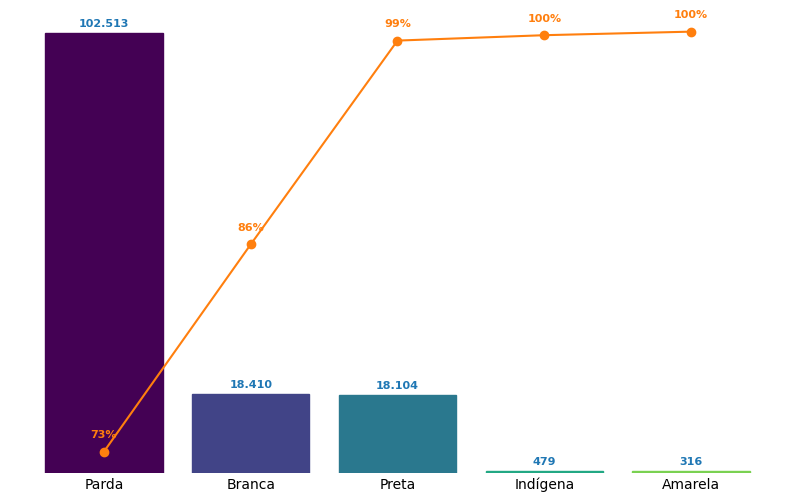

In [148]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import matplotlib.colors as mcolors

plt.style.use('default')  # Também pode usar os estilos do seaborn

fig, ax = plt.subplots(figsize=(10, 6))

ax2 = ax.twinx()

# Criar gradiente de cores
norm = mcolors.Normalize(vmin=0, vmax=len(pessoas_raca['frequencia']))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

colors = [sm.to_rgba(i) for i in range(len(pessoas_raca['frequencia']))]

# Plotagem das barras
barras = ax.bar(pessoas_raca.index, pessoas_raca['frequencia'], color='C0') # Mudança de cor para 'C0'

# Aplicando as cores diretamente às barras
for barra, cor in zip(barras, colors):
    barra.set_color(cor)

ax2.plot(pessoas_raca.index, pessoas_raca['freq_relativa_acumulada'], 
         color='C1', 
         marker='o', 
         linestyle='-'
         )

# ax.set_ylabel('Frequência', color='C0')
ax.tick_params(axis='x', rotation=0, size=0)
# ax.tick_params(axis='y', labelcolor='C0')
ax.tick_params(axis='y', left=False, labelleft=False)

# Criando uma função de formatação personalizada
def formatar_inteiros(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')

# Aplicando a função de formatação ao eixo y
ax.yaxis.set_major_formatter(mticker.FuncFormatter(formatar_inteiros))

# ax2.set_ylabel('Percentual', color='C1')
# ax2.tick_params(axis='y', labelcolor='C1')
ax2.tick_params(axis='y', right=False, labelright=False)
# ax2.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))

ax.grid(False)
ax2.grid(False)

# Retirar a notação científica do eixo x e y
# Definindo formato dos rótulos do eixo y como inteiros
ax.yaxis.set_major_formatter('{x:,.0f}')

# Adicionando as labels nas barras
for barra in barras:
    height = barra.get_height()
    ax.annotate(f'{formatar_inteiros(height, None)}',
                xy=(barra.get_x() + barra.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=8, fontweight='bold', color='C0'
                )

for i, percentual in enumerate(pessoas_raca['freq_relativa_acumulada']):
    ax2.annotate(f"{percentual:.0%}", 
                 xy=(i, percentual), 
                 textcoords='offset points', 
                 xytext=(0, 10), 
                 ha='center', 
                 fontsize=8, 
                 fontweight='bold', 
                 color='C1'
                 )
    
for spine in ax.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)

# fig.suptitle('Frequência e percentual acumulado de raça/cor das pessoas')

plt.show()


In [150]:
# Faixa etária para a pirâmide etária

intervalos = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49',
              '50-54','55-59','60-64','65-69','70-74','75-79','80+']

bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,float('inf')]

pessoas['idade_piramide'] = pd.cut(pessoas['idade'], bins=bins, labels=intervalos, right=False, ordered=True)

In [151]:
pessoas['Sexo'] = pessoas['cod_sexo_pessoa']
labels = {1: "Masculino", 2: "Feminino"}
pessoas['Sexo'] = pessoas['Sexo'].map(labels)
pessoas['Sexo'] = pessoas['Sexo'].astype('category')
# pessoas['Sexo'].cat.reorder_categories(["Masculino", "Feminino"], inplace=True)
pessoas['Sexo'].value_counts()

Sexo
Feminino     83068
Masculino    56841
Name: count, dtype: int64

In [153]:
# Pirâmide etária

import plotly.graph_objects as go

# Definindo as variáveis
y_idade = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49',
           '50-54','55-59','60-64','65-69','70-74','75-79','80+']
x_M = np.array(list(pessoas.query("Sexo == 'Masculino'").groupby('idade_piramide')[['Sexo']].size()))
x_F = np.array(list(pessoas.query("Sexo == 'Feminino'").groupby('idade_piramide')[['Sexo']].size())) * -1

fig = go.Figure()

# Adicionando barras para homens e mulheres
fig.add_trace(go.Bar(
    y=y_idade,
    x=x_M,
    orientation='h',
    name='Masculino',
    text=x_M,
    textposition="inside",
    hoverinfo='x',
))

fig.add_trace(go.Bar(
    y=y_idade,
    x=x_F,
    orientation='h',
    name='Feminino',
    text=x_F * -1,
    textposition="inside",
    hoverinfo='text',
))

# Criando o layout
fig.update_layout(
    autosize=True,
    width=1600,
    height=800,
    margin=dict(l=0, r=0, t=0, b=0),
    paper_bgcolor='white',
    plot_bgcolor='white',
    # title='<b>Pirâmide etária da população do CadÚnico em 2018</b><br><sup>Data da base de dados do CadÚnico: 2018</sup>',
    legend=dict(
        orientation="h",
        traceorder="reversed",
        yanchor="top",
        y=0.95,
        xanchor="right",
        x=0.95,
        ),
    font={
        'family': 'Arial',
        'size': 16,
        'color': 'black'
    },
    barmode='overlay',
    bargap=0.1,
    bargroupgap=0,
    # xaxis=dict(
    #     tickvals=[-800_000,-600_000, -400_000, -200_000, 0, 200_000, 400_000, 600_000, 800_000],
    #     ticktext=['800 mil','600 mil', '400 mil', '200 mil', '0', '200 mil','400 mil', '600 mil', '800 mil'],
    # ),
    yaxis=dict(
        tickmode='array',
        tickvals=list(range(len(y_idade))),
        ticktext=y_idade,
        side='left',
        anchor='x',
        position=0,
    )
)

fig.update_traces(textposition='outside',
                    #  texttemplate='%{text:s}',
                    )

fig.show()


C:\Users\nerym\AppData\Local\Temp\ipykernel_25140\4039171721.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\nerym\AppData\Local\Temp\ipykernel_25140\4039171721.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [154]:
# Fazer um cut da idade entre 0 e 6, 7 e 13, 14 e 18, 18 e 60, infinito e atribuir a uma nova coluna 'faixa_etaria'
bins_ = [0, 7, 14, 18, 60, np.inf]
labels = ['0-6', '7-13', '14-18', '18-60', '60+']
pessoas['faixa_etaria'] = pd.cut(pessoas['idade'], bins=bins_, labels=labels, right=False, include_lowest=True, ordered=False)


In [155]:
# Retirar a coluna idade e idade_piramide
pessoas.drop(['idade', 'idade_piramide'], axis=1, inplace=True)

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np

# Função para criar um histograma com boxplot
def hist_boxplot(df, column):
    '''
    Cria um gráfico com histograma e boxplot
    df: DataFrame
    column: coluna do DataFrame
    '''
    # with pd.option_context('mode.use_inf_as_na', True):
    #     # Converter valores infinitos para NaN
    #     df = df.replace([np.inf, -np.inf], np.nan)
        
    #     # Remover valores NaN para evitar problemas no plot
    #     df = df.dropna(subset=[column])
        
    fig, (ax1, ax2) = plt.subplots(nrows=2, 
                                    ncols=1, 
                                    sharex=True, 
                                    gridspec_kw={'height_ratios': (0.15, 0.85),
                                                'hspace': 0.2}
                                    )
    
    sns.boxplot(x=df[column], 
                ax=ax1, 
                showmeans=True, 
                meanline=True, 
                meanprops={'color':'C1', 
                            'linestyle':'--',
                            'linewidth':1}
                )
    
    sns.histplot(x=df[column], bins=20, kde=True, color='gray', ax=ax2)

    # ax1.set_title(f'Distribuição de {column}')
    
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    ax2.tick_params(axis='x', rotation=90)
    ax2.axvline(df[column].mean(), color='C1', linestyle='--', label='Média')
    ax2.axvline(df[column].median(), color='C2', linestyle='--', label='Mediana')
    ax2.axvline(df[column].mode()[0], color='C3', linestyle='--', label='Moda')
    
    ax2.legend()

    ax2.set_xlabel('Valor da Renda Familiar')
    ax2.set_ylabel('Frequência')
    
    for ax in (ax1, ax2):
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.set_axisbelow(True)
    
    plt.show()

c:\Users\nerym\OneDrive\Documentos\ciencia_dados\tcc\base_amostra_cad_201812\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



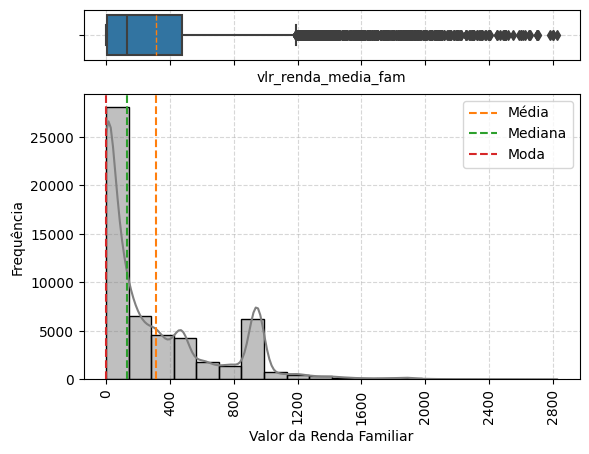

In [157]:
hist_boxplot(familia, 'vlr_renda_media_fam')

In [158]:
# # Histograma da renda das famílias
# hist, ax = plt.subplots()
# ax = sns.histplot(familia['vlr_renda_media_fam'], kde=True)
# ax.set_title('Histograma da Renda Média das Famílias')
# ax.set_xlabel('Renda Média')
# ax.set_ylabel('Frequência')
# plt.show()

In [159]:
""" Mude as labels das variáveis categoricas de número 
para algo mais descritivo. Isso facilita a interpretação dos dados 
e a visualização dos gráficos. A ordem importa."""

familia['cod_especie_domic_fam'] = familia['cod_especie_domic_fam'].replace({1.0:5, 2.0:6, 3.0:7}) # ['1 - Particular Permanente', '2 - Particular Improvisado' '3 - Coletivo']
familia['cod_material_piso_fam'] = familia['cod_material_piso_fam'].replace({1.0:7, 2.0:6, 3.0:6, 4.0:5, 5.0:4, 6.0:4, 7.0:1}) # ['1 - Terra', '2 - Cimento', '3 - Madeira aproveitada', '4 - Madeira aparelhada', '5 - Cerâmica, lajota ou pedra', '6 - Carpete', '7 - Outro Material']
familia['cod_material_domic_fam'] = familia['cod_material_domic_fam'].replace({1.0:4, 2.0:5, 3.0:5, 4.0:6, 5.0:6, 6.0:6, 7.0:7, 8.0:1}) # ['1 - Alvenaria/tijolo com revestimento', '2 - Alvenaria/tijolo sem revestimento', '3 - Madeira aparelhada', '4 - Taipa revestida', '5 - Taipa não revestida', '6 - Madeira aproveitada', '7 - Palha', '8 - Outro Material']
familia['cod_agua_canalizada_fam'] = familia['cod_agua_canalizada_fam'].replace({1.0:4, 2.0:7}) # ['1- Sim', '2 - Não']
familia['cod_abaste_agua_domic_fam'] = familia['cod_abaste_agua_domic_fam'].replace({1.0:1, 2.0:4, 3.0:4, 4.0:1}) # ['1 - Rede geral', '2 - Poço ou nascente', '3 - Outro']
familia['cod_banheiro_domic_fam'] = familia['cod_banheiro_domic_fam'].replace({1.0:4, 2.0:7}) # ['1- Sim', '2 - Não']
familia['cod_escoa_sanitario_domic_fam'] = familia['cod_escoa_sanitario_domic_fam'].replace({1.0:1, 2.0:4, 3.0:5, 4.0:6, 5.0:7, 6.0:1}) # ['1 - Rede geral', '2 - Fossa', '3 - Outro']
familia['cod_destino_lixo_domic_fam'] = familia['cod_destino_lixo_domic_fam'].replace({1.0:4, 2.0:5, 3.0:6, 4.0:6, 5.0:7, 6.0:1}) # ['1- Coletado', '2- Queimado', '3 - Enterrado', '4 - Outro']
familia['cod_iluminacao_domic_fam'] = familia['cod_iluminacao_domic_fam'].replace({1.0:4, 2.0:5, 3.0:6, 4.0:6, 5.0:7, 6.0:1}) # ['1- Elétrica', '2- Óleo', '3- Vela', '4 - Outro']
familia['cod_calcamento_domic_fam'] = familia['cod_calcamento_domic_fam'].replace({1.0:4, 2.0:6, 3.0:7}) # ['1- Sim', '2 - Não']
familia['cod_familia_indigena_fam'] = familia['cod_familia_indigena_fam'].replace({1.0:7, 2.0:4}) # ['1 - Sim', '2 - Não']
familia['ind_familia_quilombola_fam'] = familia['ind_familia_quilombola_fam'].replace({1.0:7, 2.0:4}) # ['1 - Sim', '2 - Não']
familia['pbf'] = familia['pbf'].replace({0:4, 1:6, 2:7}) # ['0 - Não', '1 - Sim', '2 - Descoberto']

In [160]:
""" Mude as labels das variáveis categoricas de número 
para algo mais descritivo. Isso facilita a interpretação dos dados 
e a visualização dos gráficos. A ordem importa."""

pessoas['cod_sexo_pessoa'] = pessoas['cod_sexo_pessoa'].replace({1.0:1, 2.0:2}) # ['1 - Masculino', '2 - Feminino']
pessoas['cod_raca_cor_pessoa'] = pessoas['cod_raca_cor_pessoa'].replace({1.0:4, 2.0:7, 3.0:4, 4.0:6, 5.0:6}) # ['1 - Branca', '2 - Preta', '3 - Amarela', '4 - Parda', '5 - Indígena']
pessoas['cod_deficiencia_memb'] = pessoas['cod_deficiencia_memb'].replace({1:7, 2:4}) # ['1 - Sim', '2 - Não']
pessoas['cod_sabe_ler_escrever_memb'] = pessoas['cod_sabe_ler_escrever_memb'].replace({1.0:4, 2.0:7}) # ['1 - Sim', '2 - Não']
pessoas['ind_frequenta_escola_memb'] = pessoas['ind_frequenta_escola_memb'].replace({1.0:5, 2.0:4, 3.0:5, 4.0:7}) # ['1 - Sim, rede pública', '2 - Sim, rede particular', '3 - Já frequentou', '4 - Nunca frequentou']
pessoas['cod_escola_local_memb'] = pessoas['cod_escola_local_memb'].replace({1.0:4, 2.0:7}) # ['1 - Sim', '2 - Não']
pessoas['cod_curso_frequenta_memb'] = pessoas['cod_curso_frequenta_memb'].replace({1.0:7, 2.0:6, 3.0:5, 4.0:5, 5.0:5, 6.0:6, 7.0:5, 8.0:6, 9.0:6, 10.0:6, 11.0:6, 12.0:6, 13.0:2, 14.0:4}) # ['1 - Creche', '2 - Pré-escola (exceto CA)', '3 - Classe de Alfabetização - CA', '4 - Ensino Fundamental regular (duração 8 anos)', '5 - Ensino Fundamental regular (duração 9 anos)', '6 - Ensino Fundamental especial', '7 - Ensino Médio regular', '8 - Ensino Médio especial', '9 - Ensino Fundamental EJA - séries iniciais (Supletivo 1ª a 4ª)', '10 - Ensino Fundamental EJA - séries finais (Supletivo 5ª a 8ª)', '11 - Ensino Médio EJA (Supletivo)', '12 - Alfabetização para adultos (Mobral, etc.)', '13 - Superior, Aperfeiçoamento, Especialização, Mestrado, Doutorado', '14 - Pré-vestibular']
pessoas['cod_principal_trab_memb'] = pessoas['cod_principal_trab_memb'].replace({1.0:6, 2.0:6, 3.0:6, 4.0:4, 5.0:6, 6.0:4, 7.0:7, 8.0:2, 9.0:3, 10.0:5, 11.0:5}) # ['1 - Trabalhador por conta própria (bico, autônomo)', '2 - Trabalhador temporário em área rural', '3 - Trabalhador sem carteira de trabalho assinada', '4 - Empregado com carteira de trabalho assinada', '5 - Trabalhador doméstico sem carteira de trabalho assinada', '6 - Trabalhador doméstico com carteira de trabalho assinada', '7 - Trabalhador não-remunerado', '8 - Militar ou servidor público', '9 - Empregador', '10 - Estagiário, '11 - Aprendiz']
pessoas['cod_trabalho_12_meses_memb'] = pessoas['cod_trabalho_12_meses_memb'].replace({1.0:4, 2.0:7}) # ['1 - Sim', '2 - Não']
pessoas['faixa_etaria'] = pessoas['faixa_etaria'].replace({'0-6':7, '7-13':6, '14-18':6, '18-60':4, '60+':6}) # ['0-6', '7-13', '14-18', '18-60', '60+']

C:\Users\nerym\AppData\Local\Temp\ipykernel_25140\1343805605.py:14: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\nerym\AppData\Local\Temp\ipykernel_25140\1343805605.py:14: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



In [161]:
# Transformar faixa_etaria em inteiro
pessoas['faixa_etaria'] = pessoas['faixa_etaria'].astype(int)

In [162]:
# Ver o tipo de faixa_etaria
pessoas['faixa_etaria'].dtype

dtype('int32')

In [163]:
# Merge entre os dataframes familia e pessoas de forma a manter cada coluna de cada dataframe
df_merge = pd.merge(familia, pessoas, on='id_familia', how='outer')

In [164]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139909 entries, 0 to 139908
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   cd_ibge                        139909 non-null  int64   
 1   id_familia                     139909 non-null  float64 
 2   vlr_renda_media_fam            139906 non-null  float64 
 3   cod_especie_domic_fam          139340 non-null  float64 
 4   qtd_comodos_domic_fam          135775 non-null  float64 
 5   qtd_comodos_dormitorio_fam     135808 non-null  float64 
 6   cod_material_piso_fam          135836 non-null  float64 
 7   cod_material_domic_fam         135836 non-null  float64 
 8   cod_agua_canalizada_fam        135836 non-null  float64 
 9   cod_abaste_agua_domic_fam      135836 non-null  float64 
 10  cod_banheiro_domic_fam         135836 non-null  float64 
 11  cod_escoa_sanitario_domic_fam  132864 non-null  float64 
 12  cod_destino_lixo

In [165]:
# Verificar se há duplicatas no dataframe pela variável id_familia
df_merge['id_familia'].duplicated().sum()

84746

In [166]:
# Retirar as duplicatas do dataframe
df_merge = df_merge.drop_duplicates(subset=['id_familia'])

In [167]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55163 entries, 0 to 139908
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   cd_ibge                        55163 non-null  int64   
 1   id_familia                     55163 non-null  float64 
 2   vlr_renda_media_fam            55162 non-null  float64 
 3   cod_especie_domic_fam          54604 non-null  float64 
 4   qtd_comodos_domic_fam          52815 non-null  float64 
 5   qtd_comodos_dormitorio_fam     52826 non-null  float64 
 6   cod_material_piso_fam          52836 non-null  float64 
 7   cod_material_domic_fam         52836 non-null  float64 
 8   cod_agua_canalizada_fam        52836 non-null  float64 
 9   cod_abaste_agua_domic_fam      52836 non-null  float64 
 10  cod_banheiro_domic_fam         52836 non-null  float64 
 11  cod_escoa_sanitario_domic_fam  51635 non-null  float64 
 12  cod_destino_lixo_domic_fam     52836

In [168]:
# Verificar percentual de valores nulos
df_merge.isnull().mean() * 100

cd_ibge                          0.00
id_familia                       0.00
vlr_renda_media_fam              0.00
cod_especie_domic_fam            1.01
qtd_comodos_domic_fam            4.26
qtd_comodos_dormitorio_fam       4.24
cod_material_piso_fam            4.22
cod_material_domic_fam           4.22
cod_agua_canalizada_fam          4.22
cod_abaste_agua_domic_fam        4.22
cod_banheiro_domic_fam           4.22
cod_escoa_sanitario_domic_fam    6.40
cod_destino_lixo_domic_fam       4.22
cod_iluminacao_domic_fam         4.22
cod_calcamento_domic_fam         4.22
cod_familia_indigena_fam         0.00
ind_familia_quilombola_fam       0.13
marc_pbf                         0.00
descobertos_pbf                  0.00
pbf                              0.00
cod_sexo_pessoa                  0.00
cod_raca_cor_pessoa              0.09
cod_deficiencia_memb             0.00
cod_sabe_ler_escrever_memb       0.01
ind_frequenta_escola_memb        0.01
cod_escola_local_memb           74.35
cod_curso_fr

In [169]:
# fig, ax = plt.subplots(figsize=(6, 4))
# (1 - df_merge.isnull().mean()).abs().plot(kind='bar', ax=ax)
# fig.show()

In [171]:
df_merge['cd_ibge'].nunique()

34

In [172]:
df_merge.shape

(55163, 40)

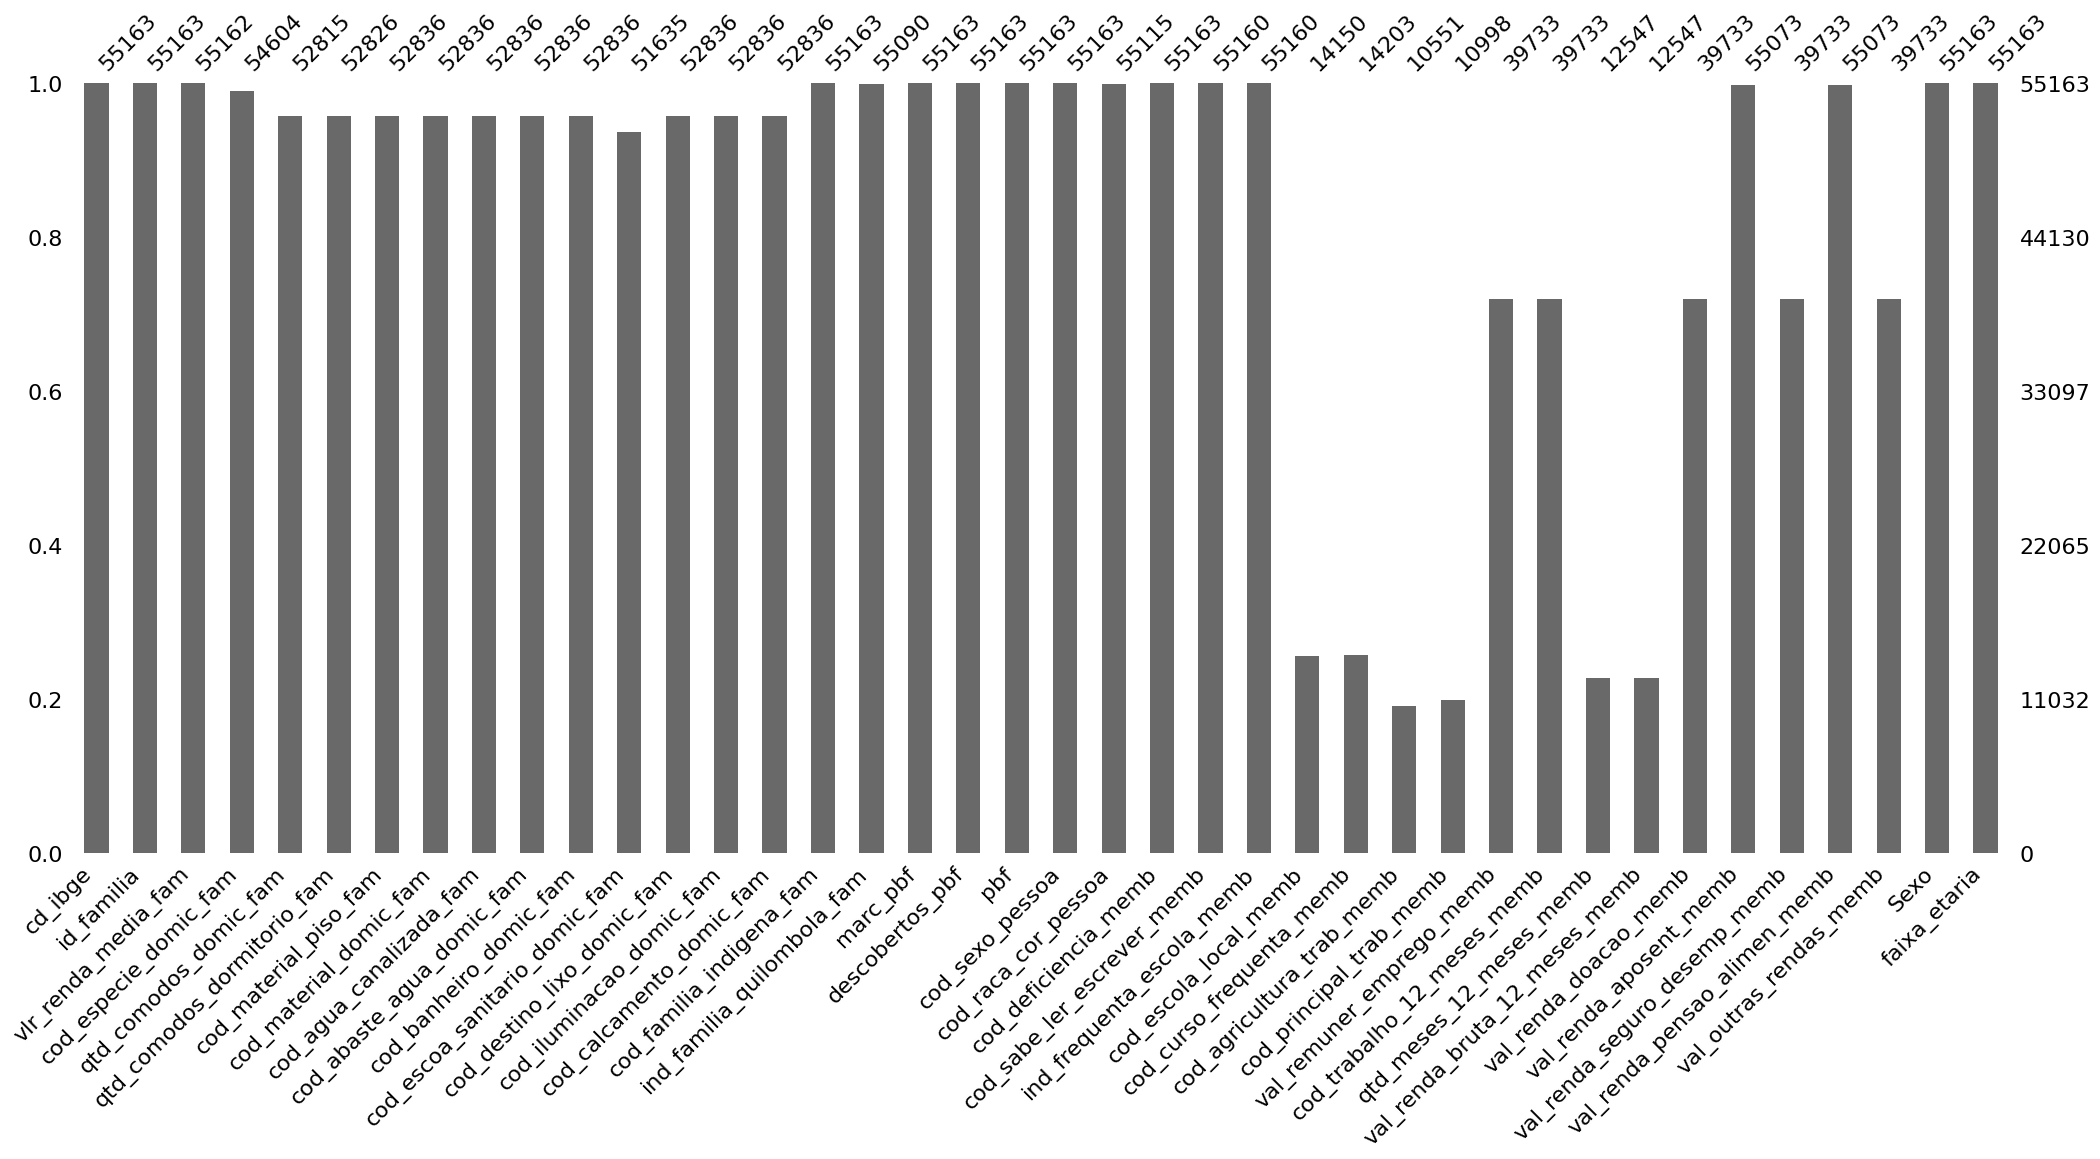

In [173]:
ax = msno.bar(df_merge)
ax.get_figure().savefig('amostra_missing_values_poa.png')

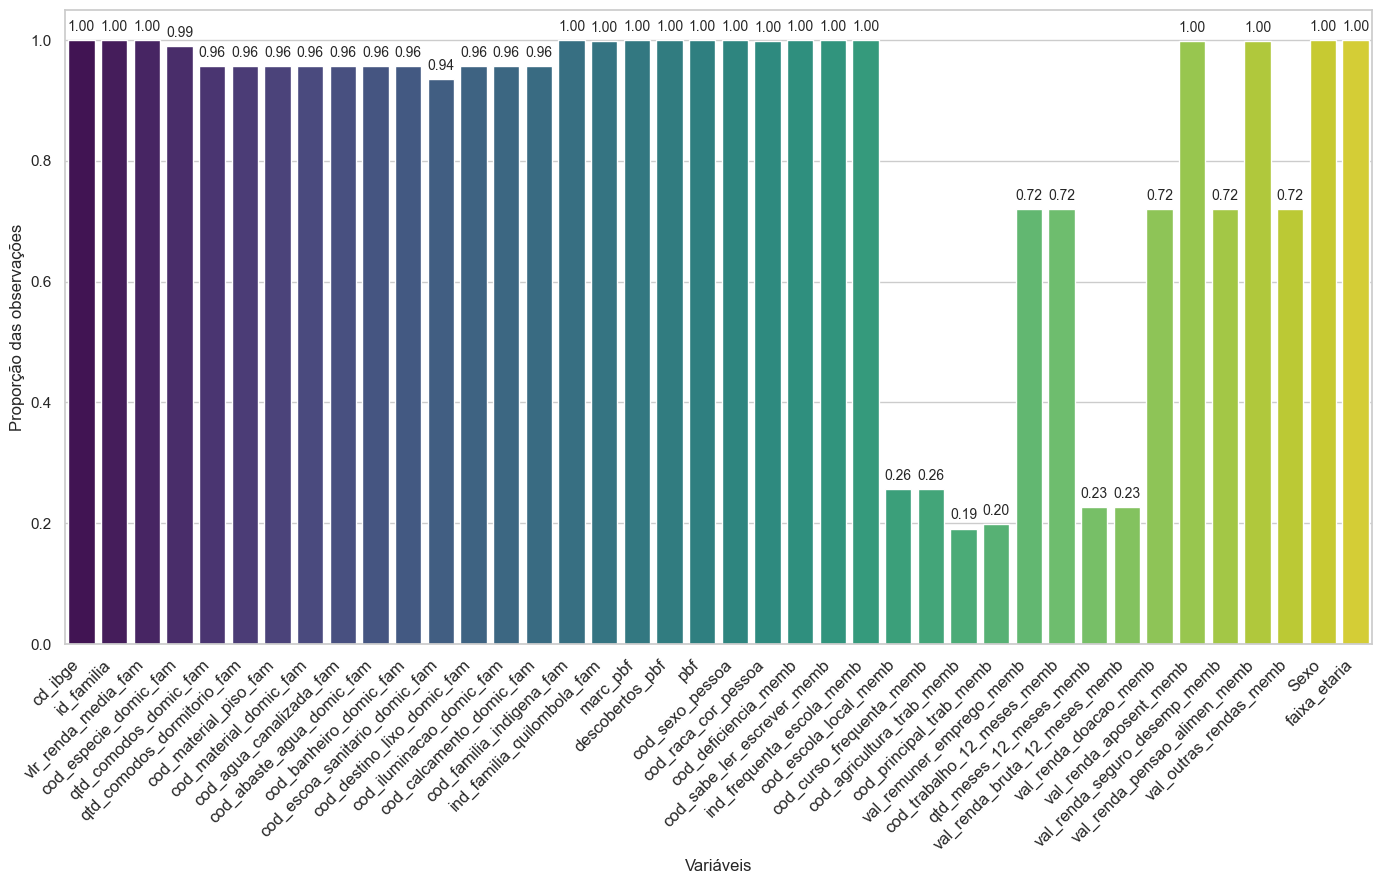

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que df_merge seja o seu DataFrame
# Calcule as médias dos valores não nulos
values = (1 - df_merge.isnull().mean()).abs()
values = values.reset_index()
values.columns = ['Coluna', 'Proporção']

plt.figure(figsize=(14, 9))
sns.set(style="whitegrid")

# Criando o gráfico de barras
ax = sns.barplot(x='Coluna', y='Proporção', data=values, palette='viridis')

# Adicionando os valores no topo de cada barra com tamanho de fonte menor
for i, value in enumerate(values['Proporção']):
    ax.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Ajustando os rótulos dos eixos
ax.set_xlabel('Variáveis', fontsize=12)
ax.set_ylabel('Proporção das observações', fontsize=12)

# Ajustando os rótulos das categorias no eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Ajustando o título
# ax.set_title('Valores Não Nulos no DataFrame', fontsize=16, fontweight='bold')

# Adicionando o subtítulo abaixo do título principal
# plt.text(0.5, -0.03, 'Amostra da base de dados do CadÚnico 2018', ha='center', fontsize=12, fontweight='ultralight', transform=plt.gcf().transFigure)

plt.tight_layout()

# Salvar o gráfico antes de exibi-lo
plt.savefig("faltantes_proporcao_1.png", dpi=400)

# Mostrar o gráfico
plt.show()


In [175]:
# Proporção de dados faltantes
df_merge.isnull().mean().sort_values(ascending=False) * 100


cod_agricultura_trab_memb       80.87
cod_principal_trab_memb         80.06
qtd_meses_12_meses_memb         77.25
val_renda_bruta_12_meses_memb   77.25
cod_escola_local_memb           74.35
cod_curso_frequenta_memb        74.25
val_remuner_emprego_memb        27.97
cod_trabalho_12_meses_memb      27.97
val_renda_doacao_memb           27.97
val_renda_seguro_desemp_memb    27.97
val_outras_rendas_memb          27.97
cod_escoa_sanitario_domic_fam    6.40
qtd_comodos_domic_fam            4.26
qtd_comodos_dormitorio_fam       4.24
cod_material_domic_fam           4.22
cod_material_piso_fam            4.22
cod_calcamento_domic_fam         4.22
cod_iluminacao_domic_fam         4.22
cod_banheiro_domic_fam           4.22
cod_abaste_agua_domic_fam        4.22
cod_agua_canalizada_fam          4.22
cod_destino_lixo_domic_fam       4.22
cod_especie_domic_fam            1.01
val_renda_pensao_alimen_memb     0.16
val_renda_aposent_memb           0.16
ind_familia_quilombola_fam       0.13
cod_raca_cor

In [176]:
# Excluir as colunas missing
df_merge.drop(columns=[
    # 'cd_ibge',
    'cod_escola_local_memb',
    'cod_curso_frequenta_memb',
    'cod_agricultura_trab_memb',
    'cod_principal_trab_memb',
    'val_remuner_emprego_memb',
    'cod_trabalho_12_meses_memb',
    'qtd_meses_12_meses_memb',
    'val_renda_bruta_12_meses_memb',
    'val_renda_doacao_memb',
    'val_renda_seguro_desemp_memb',
    'val_outras_rendas_memb',
    'marc_pbf',
    'descobertos_pbf',
    'Sexo',
], inplace=True)


In [177]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55163 entries, 0 to 139908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cd_ibge                        55163 non-null  int64  
 1   id_familia                     55163 non-null  float64
 2   vlr_renda_media_fam            55162 non-null  float64
 3   cod_especie_domic_fam          54604 non-null  float64
 4   qtd_comodos_domic_fam          52815 non-null  float64
 5   qtd_comodos_dormitorio_fam     52826 non-null  float64
 6   cod_material_piso_fam          52836 non-null  float64
 7   cod_material_domic_fam         52836 non-null  float64
 8   cod_agua_canalizada_fam        52836 non-null  float64
 9   cod_abaste_agua_domic_fam      52836 non-null  float64
 10  cod_banheiro_domic_fam         52836 non-null  float64
 11  cod_escoa_sanitario_domic_fam  51635 non-null  float64
 12  cod_destino_lixo_domic_fam     52836 non-null  flo

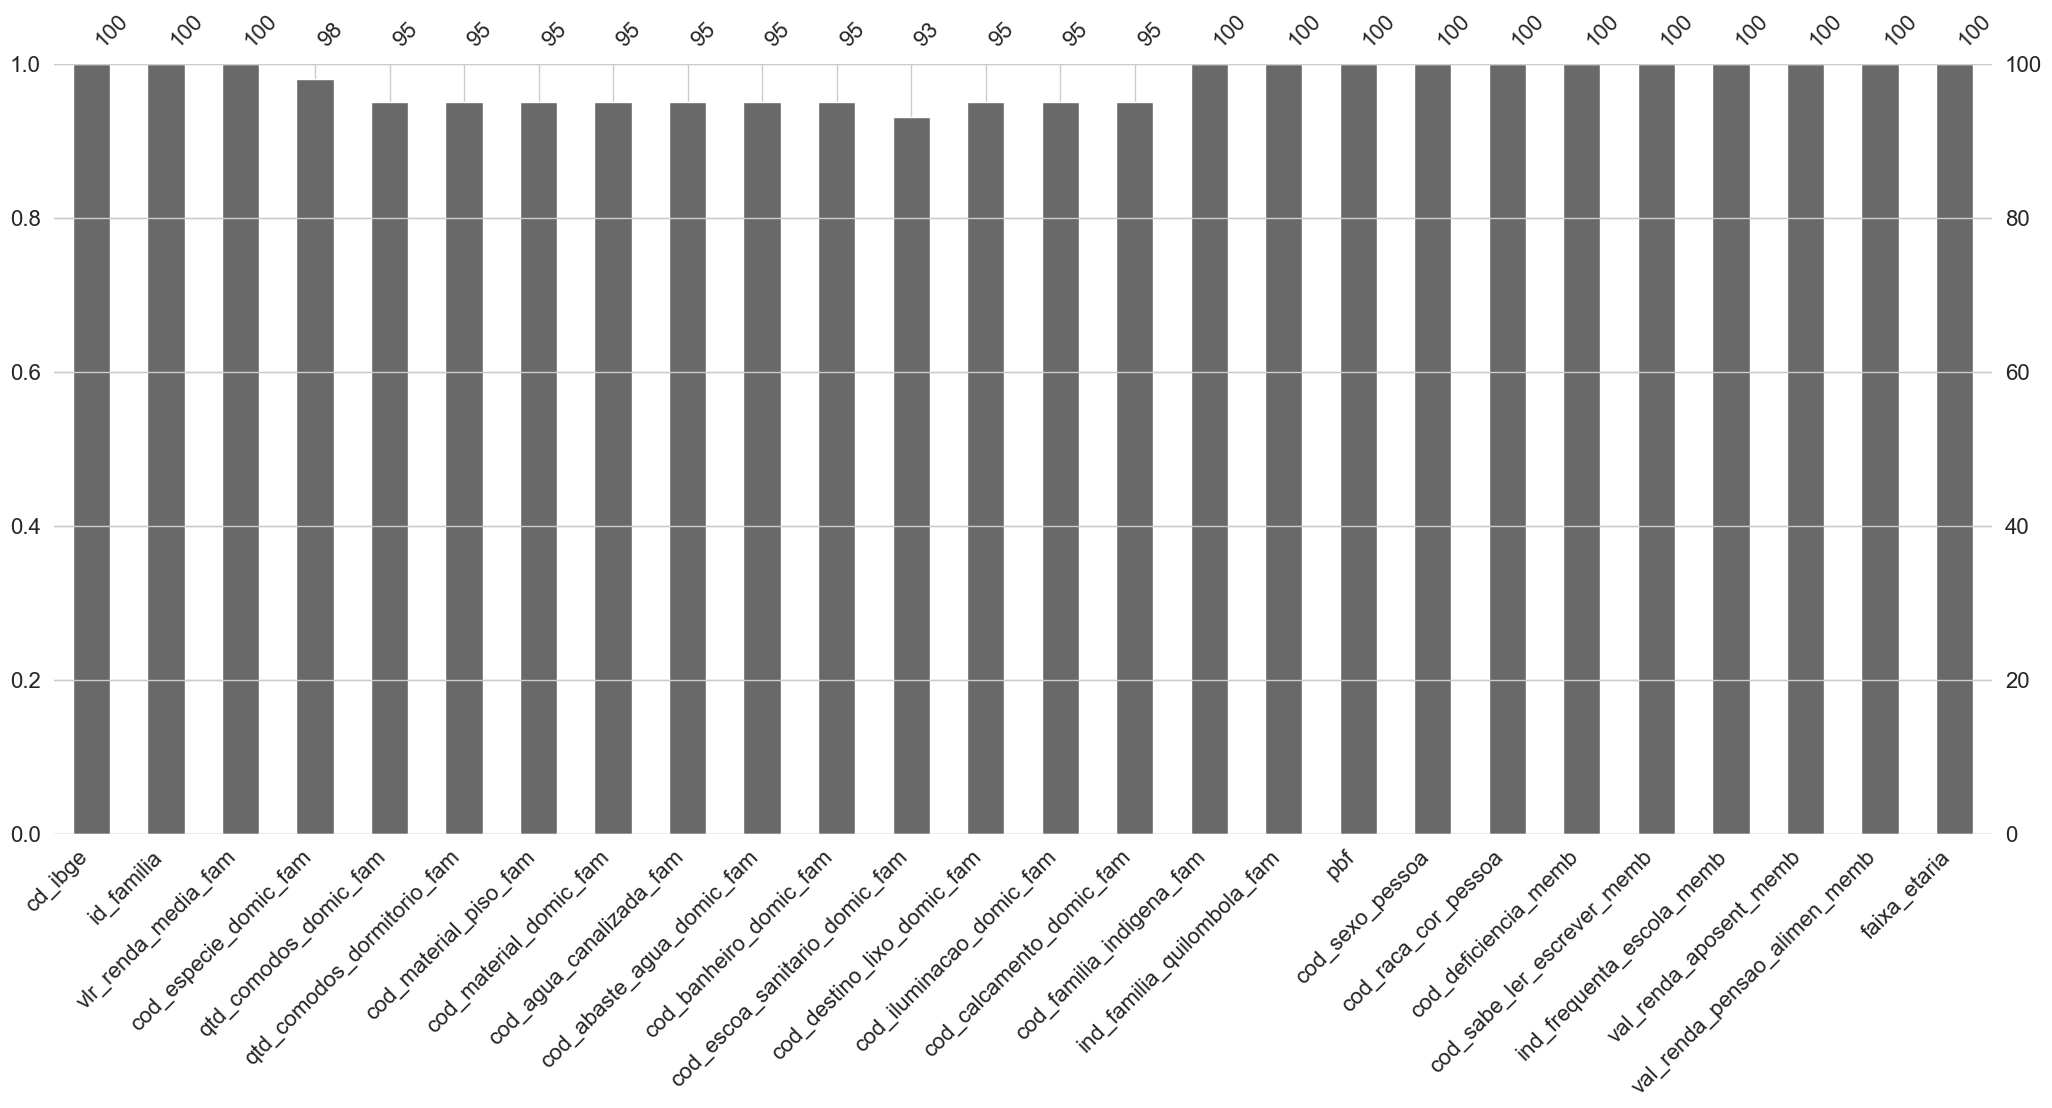

In [178]:
# Verificar percentual de valores nulos e salvar para impressão. Reduza a figura para 6x4
ax = msno.bar(df_merge.sample(100),)
ax.get_figure().savefig('amostra_missing_values_poa.png')


In [179]:
# Colocar id_familia como index
df_merge.set_index('cd_ibge', inplace=True)

In [180]:
# Excluir id_familias
df_merge.drop(columns=['id_familia'], inplace=True)

In [181]:
def estatisticas_dataframe(df):
    estatisticas = pd.DataFrame(columns=['Coluna', 'Média', 'Mediana', 'Moda'])
    
    for coluna in df.columns:
        media = df[coluna].mean()
        mediana = df[coluna].median()
        moda = df[coluna].mode()[0]  # Pode haver mais de uma moda, pegamos apenas a primeira
        estatisticas = pd.concat([estatisticas, pd.DataFrame({'Coluna': [coluna], 'Média': [media], 'Mediana': [mediana], 'Moda': [moda]})], 
                                 ignore_index=True,)
    
    return estatisticas

# Exemplo de uso
# Suponha que 'df' seja seu DataFrame
# stats = estatisticas_dataframe(df)
# print(stats)


In [182]:
# filtre as colunas que são do tipo float e inteiro e exclua as linhas com NaN
df_numerico = df_merge.select_dtypes(include=['float', 'int'])#.dropna()


In [183]:
estatisticas_dataframe(df_numerico)

C:\Users\nerym\AppData\Local\Temp\ipykernel_25140\2454835720.py:8: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Coluna,Média,Mediana,Moda
0,vlr_renda_media_fam,309.60,133.00,0.00
1,cod_especie_domic_fam,5.04,5.00,5.00
2,qtd_comodos_domic_fam,4.12,4.00,4.00
3,qtd_comodos_dormitorio_fam,1.71,2.00,2.00
4,cod_material_piso_fam,4.58,4.00,4.00
5,cod_material_domic_fam,4.51,4.00,4.00
6,cod_agua_canalizada_fam,4.07,4.00,4.00
7,cod_abaste_agua_domic_fam,1.26,1.00,1.00
8,cod_banheiro_domic_fam,4.07,4.00,4.00
9,cod_escoa_sanitario_domic_fam,1.82,1.00,1.00


In [185]:
# Retirar os valores missing
df_merge.dropna(inplace=True)


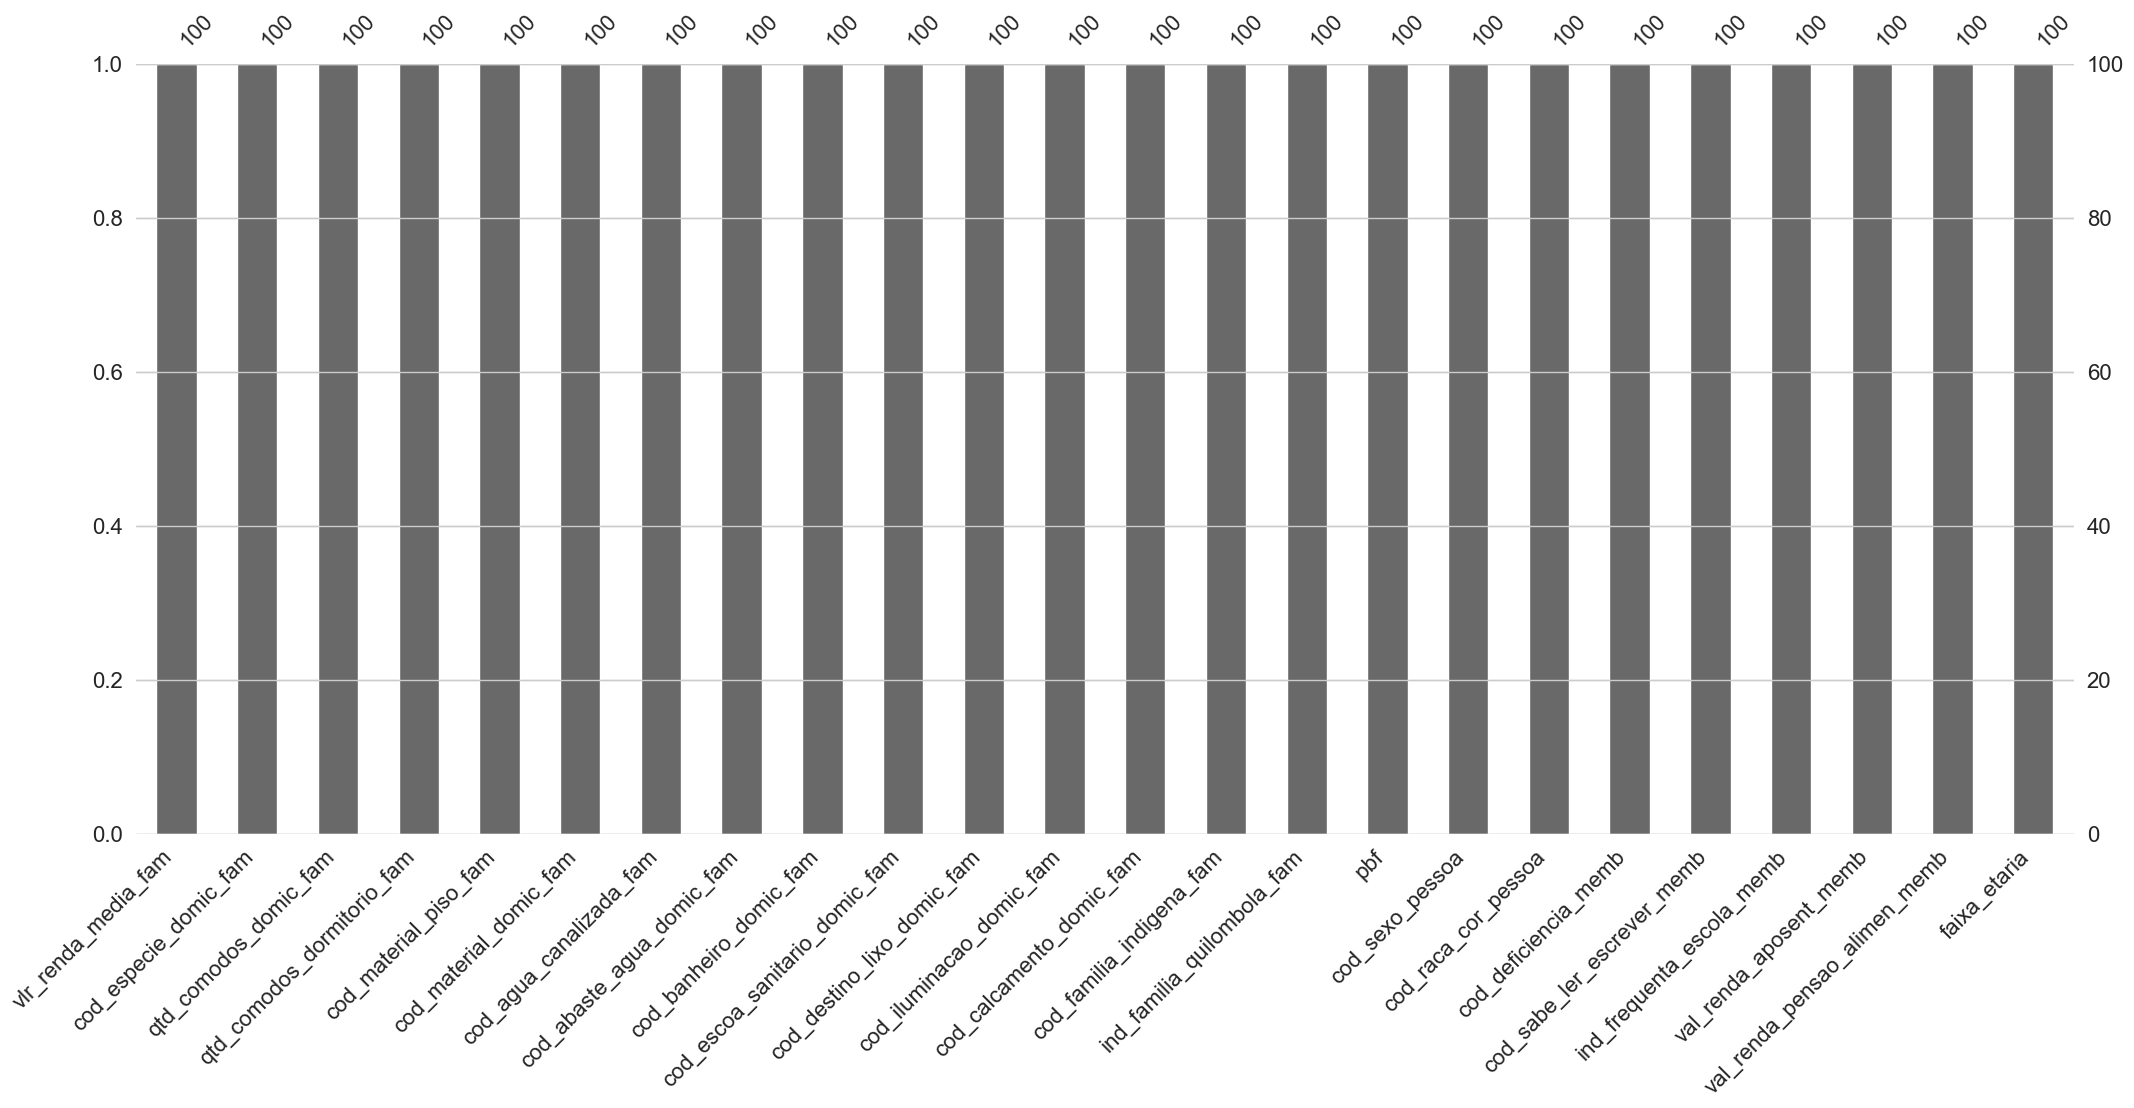

In [186]:
ax = msno.bar(df_merge.sample(100))
ax.get_figure().savefig('amostra_missing_values_poa_final.png')

In [187]:
df_merge.shape

(51440, 24)

In [188]:
df = df_merge.copy()

In [189]:
# Lista com os nomes das colunas
lista = list(df.columns)
lista

['vlr_renda_media_fam',
 'cod_especie_domic_fam',
 'qtd_comodos_domic_fam',
 'qtd_comodos_dormitorio_fam',
 'cod_material_piso_fam',
 'cod_material_domic_fam',
 'cod_agua_canalizada_fam',
 'cod_abaste_agua_domic_fam',
 'cod_banheiro_domic_fam',
 'cod_escoa_sanitario_domic_fam',
 'cod_destino_lixo_domic_fam',
 'cod_iluminacao_domic_fam',
 'cod_calcamento_domic_fam',
 'cod_familia_indigena_fam',
 'ind_familia_quilombola_fam',
 'pbf',
 'cod_sexo_pessoa',
 'cod_raca_cor_pessoa',
 'cod_deficiencia_memb',
 'cod_sabe_ler_escrever_memb',
 'ind_frequenta_escola_memb',
 'val_renda_aposent_memb',
 'val_renda_pensao_alimen_memb',
 'faixa_etaria']

In [190]:
# Enumere as variáveis da lista a partir do índice 1
for i, item in enumerate(lista, 1):
    print(i, item)

1 vlr_renda_media_fam
2 cod_especie_domic_fam
3 qtd_comodos_domic_fam
4 qtd_comodos_dormitorio_fam
5 cod_material_piso_fam
6 cod_material_domic_fam
7 cod_agua_canalizada_fam
8 cod_abaste_agua_domic_fam
9 cod_banheiro_domic_fam
10 cod_escoa_sanitario_domic_fam
11 cod_destino_lixo_domic_fam
12 cod_iluminacao_domic_fam
13 cod_calcamento_domic_fam
14 cod_familia_indigena_fam
15 ind_familia_quilombola_fam
16 pbf
17 cod_sexo_pessoa
18 cod_raca_cor_pessoa
19 cod_deficiencia_memb
20 cod_sabe_ler_escrever_memb
21 ind_frequenta_escola_memb
22 val_renda_aposent_memb
23 val_renda_pensao_alimen_memb
24 faixa_etaria


In [191]:
# Pontuação para cada critério da lista
pontuacoes = [25,20,18,20,17,20,20,21,21,21,21,21,15,22,22,23,24,24,24,24,24,20,20,22]

# Criar um dicionário com o nome da lista como chave e a pontuação como valor
dic_pontuacoes = dict(zip(lista, pontuacoes))
dic_pontuacoes

{'vlr_renda_media_fam': 25,
 'cod_especie_domic_fam': 20,
 'qtd_comodos_domic_fam': 18,
 'qtd_comodos_dormitorio_fam': 20,
 'cod_material_piso_fam': 17,
 'cod_material_domic_fam': 20,
 'cod_agua_canalizada_fam': 20,
 'cod_abaste_agua_domic_fam': 21,
 'cod_banheiro_domic_fam': 21,
 'cod_escoa_sanitario_domic_fam': 21,
 'cod_destino_lixo_domic_fam': 21,
 'cod_iluminacao_domic_fam': 21,
 'cod_calcamento_domic_fam': 15,
 'cod_familia_indigena_fam': 22,
 'ind_familia_quilombola_fam': 22,
 'pbf': 23,
 'cod_sexo_pessoa': 24,
 'cod_raca_cor_pessoa': 24,
 'cod_deficiencia_memb': 24,
 'cod_sabe_ler_escrever_memb': 24,
 'ind_frequenta_escola_memb': 24,
 'val_renda_aposent_memb': 20,
 'val_renda_pensao_alimen_memb': 20,
 'faixa_etaria': 22}

In [192]:
# Pontuações do maior para o menor
dict_pontuacoes_ordenadas = dict(sorted(dic_pontuacoes.items(), key=lambda x: x[1], reverse=True))
dict_pontuacoes_ordenadas

{'vlr_renda_media_fam': 25,
 'cod_sexo_pessoa': 24,
 'cod_raca_cor_pessoa': 24,
 'cod_deficiencia_memb': 24,
 'cod_sabe_ler_escrever_memb': 24,
 'ind_frequenta_escola_memb': 24,
 'pbf': 23,
 'cod_familia_indigena_fam': 22,
 'ind_familia_quilombola_fam': 22,
 'faixa_etaria': 22,
 'cod_abaste_agua_domic_fam': 21,
 'cod_banheiro_domic_fam': 21,
 'cod_escoa_sanitario_domic_fam': 21,
 'cod_destino_lixo_domic_fam': 21,
 'cod_iluminacao_domic_fam': 21,
 'cod_especie_domic_fam': 20,
 'qtd_comodos_dormitorio_fam': 20,
 'cod_material_domic_fam': 20,
 'cod_agua_canalizada_fam': 20,
 'val_renda_aposent_memb': 20,
 'val_renda_pensao_alimen_memb': 20,
 'qtd_comodos_domic_fam': 18,
 'cod_material_piso_fam': 17,
 'cod_calcamento_domic_fam': 15}

In [193]:
# Atribuição de pesos

# Calcular a soma dos valores no dicionário
soma_valores = sum(dict_pontuacoes_ordenadas.values())

# Criar um novo dicionário com os valores normalizados ("peso") pelo método do Fator Gaussiano
dict_pontuacoes_normalizado = {chave: valor / soma_valores for chave, valor in dict_pontuacoes_ordenadas.items()}

# Exibir o resultado
print("Dicionário de pontuações normalizado:")
print(dict_pontuacoes_normalizado)


Dicionário de pontuações normalizado:
{'vlr_renda_media_fam': 0.04911591355599214, 'cod_sexo_pessoa': 0.047151277013752456, 'cod_raca_cor_pessoa': 0.047151277013752456, 'cod_deficiencia_memb': 0.047151277013752456, 'cod_sabe_ler_escrever_memb': 0.047151277013752456, 'ind_frequenta_escola_memb': 0.047151277013752456, 'pbf': 0.04518664047151277, 'cod_familia_indigena_fam': 0.043222003929273084, 'ind_familia_quilombola_fam': 0.043222003929273084, 'faixa_etaria': 0.043222003929273084, 'cod_abaste_agua_domic_fam': 0.0412573673870334, 'cod_banheiro_domic_fam': 0.0412573673870334, 'cod_escoa_sanitario_domic_fam': 0.0412573673870334, 'cod_destino_lixo_domic_fam': 0.0412573673870334, 'cod_iluminacao_domic_fam': 0.0412573673870334, 'cod_especie_domic_fam': 0.03929273084479371, 'qtd_comodos_dormitorio_fam': 0.03929273084479371, 'cod_material_domic_fam': 0.03929273084479371, 'cod_agua_canalizada_fam': 0.03929273084479371, 'val_renda_aposent_memb': 0.03929273084479371, 'val_renda_pensao_alimen_memb

In [194]:
# O critério  monotônico de custo
df['vlr_renda_media_fam'] = df['vlr_renda_media_fam'] * (-1)
df['qtd_comodos_domic_fam'] = df['qtd_comodos_domic_fam'] * (-1)
df['qtd_comodos_dormitorio_fam'] = df['qtd_comodos_dormitorio_fam'] * (-1)
df['val_renda_aposent_memb'] = df['val_renda_aposent_memb'] * (-1)
df['val_renda_pensao_alimen_memb'] = df['val_renda_pensao_alimen_memb'] * (-1)

In [195]:
# Calcular a média para cada critério
media = df.mean()

# Exibir os resultados
print("Média para cada critério:")
print(media)


Média para cada critério:
vlr_renda_media_fam             -317.14
cod_especie_domic_fam              5.00
qtd_comodos_domic_fam             -4.16
qtd_comodos_dormitorio_fam        -1.72
cod_material_piso_fam              4.56
cod_material_domic_fam             4.49
cod_agua_canalizada_fam            4.05
cod_abaste_agua_domic_fam          1.26
cod_banheiro_domic_fam             4.00
cod_escoa_sanitario_domic_fam      1.82
cod_destino_lixo_domic_fam         4.07
cod_iluminacao_domic_fam           4.34
cod_calcamento_domic_fam           5.11
cod_familia_indigena_fam           4.00
ind_familia_quilombola_fam         4.00
pbf                                5.37
cod_sexo_pessoa                    1.61
cod_raca_cor_pessoa                4.63
cod_deficiencia_memb               4.35
cod_sabe_ler_escrever_memb         4.62
ind_frequenta_escola_memb          5.24
val_renda_aposent_memb          -184.97
val_renda_pensao_alimen_memb      -9.04
faixa_etaria                       5.22
dtype: float64

In [196]:
# Calcular o desvio padrão para cada critério
'''
Atenção! Por padrão, a função std() calcula a amostra (n-1) [std(dddof=1)], logo, o argumento 'ddof' (grau de liberdade)
deve ser igual a zero ser calculada para a população completa ou universo [std(ddof=0)] ao invés da amostra para não haver erro.
'''

desvio_padrao = df.std(ddof=0)

# Exibir os resultados
print("Desvio padrão para cada critério:")
print(desvio_padrao)


Desvio padrão para cada critério:
vlr_renda_media_fam             386.14
cod_especie_domic_fam             0.00
qtd_comodos_domic_fam             1.25
qtd_comodos_dormitorio_fam        0.69
cod_material_piso_fam             0.96
cod_material_domic_fam            0.70
cod_agua_canalizada_fam           0.39
cod_abaste_agua_domic_fam         0.84
cod_banheiro_domic_fam            0.00
cod_escoa_sanitario_domic_fam     1.55
cod_destino_lixo_domic_fam        0.31
cod_iluminacao_domic_fam          0.95
cod_calcamento_domic_fam          1.40
cod_familia_indigena_fam          0.00
ind_familia_quilombola_fam        0.10
pbf                               1.18
cod_sexo_pessoa                   0.49
cod_raca_cor_pessoa               1.12
cod_deficiencia_memb              0.97
cod_sabe_ler_escrever_memb        1.21
ind_frequenta_escola_memb         0.68
val_renda_aposent_memb          402.28
val_renda_pensao_alimen_memb     62.70
faixa_etaria                      1.19
dtype: float64


In [197]:
# Calcular o Z-score para cada critério
z_score = (df - media) / desvio_padrao

# Exibir os resultados
print("Z-score para cada critério:")
print(z_score)


Z-score para cada critério:
         vlr_renda_media_fam  cod_especie_domic_fam  qtd_comodos_domic_fam  \
cd_ibge                                                                      
4314803                 0.67                    NaN                  -0.67   
4323002                -0.14                    NaN                   0.13   
4312401                 0.82                    NaN                   1.73   
4323002                 0.75                    NaN                   0.13   
4318705                 0.69                    NaN                   1.73   
...                      ...                    ...                    ...   
4314902                 0.82                    NaN                   1.73   
4314902                 0.82                    NaN                   0.93   
4314902                 0.82                    NaN                  -0.67   
4314902                -0.26                    NaN                   0.13   
4314902                 0.82        

In [198]:
from scipy.stats import norm

# Calcular o Z-score para cada critério
z_score = (df - media) / desvio_padrao

# Aplicar a função de distribuição acumulada (CDF) para normalizar os valores
normalized_values = norm.cdf(z_score)

# Conversão dos valores normalizados para float para evitar advertências do Pandas
normalized_values = normalized_values.astype(float)

# Exibir os resultados
print("Valores normalizados:")
print(normalized_values)


Valores normalizados:
[[0.74892413        nan 0.25194739 ... 0.67716799 0.55732651 0.93284917]
 [0.44555712        nan 0.55179731 ... 0.67716799 0.55732651 0.93284917]
 [0.79426615        nan 0.9579484  ... 0.67716799 0.55732651 0.93284917]
 ...
 [0.79426615        nan 0.25194739 ... 0.67716799 0.55732651 0.15391339]
 [0.39896654        nan 0.55179731 ... 0.67716799 0.55732651 0.15391339]
 [0.79426615        nan 0.55179731 ... 0.67716799 0.55732651 0.74482854]]


In [199]:
# Substituir os valores no DataFrame pelos valores normalizados
df[:] = normalized_values

# Exibir o DataFrame com os valores normalizados
print("DataFrame com valores normalizados:")
print(df)


DataFrame com valores normalizados:
         vlr_renda_media_fam  cod_especie_domic_fam  qtd_comodos_domic_fam  \
cd_ibge                                                                      
4314803                 0.75                    NaN                   0.25   
4323002                 0.45                    NaN                   0.55   
4312401                 0.79                    NaN                   0.96   
4323002                 0.77                    NaN                   0.55   
4318705                 0.76                    NaN                   0.96   
...                      ...                    ...                    ...   
4314902                 0.79                    NaN                   0.96   
4314902                 0.79                    NaN                   0.82   
4314902                 0.79                    NaN                   0.25   
4314902                 0.40                    NaN                   0.55   
4314902                 0.79

C:\Users\nerym\AppData\Local\Temp\ipykernel_25140\4191658696.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.70312403 0.12254344 0.70312403 ... 0.9164056  0.12254344 0.70312403]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\nerym\AppData\Local\Temp\ipykernel_25140\4191658696.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.10450165 0.78697857 0.10450165 ... 0.78697857 0.78697857 0.78697857]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\nerym\AppData\Local\Temp\ipykernel_25140\4191658696.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.35707666 0.35707666 0.35707666 ... 0.35707666 0.35707666 0.35707666]' has dtype incompatible with int64, please expli

In [200]:
df

,vlr_renda_media_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,cod_material_piso_fam,cod_material_domic_fam,cod_agua_canalizada_fam,cod_abaste_agua_domic_fam,cod_banheiro_domic_fam,cod_escoa_sanitario_domic_fam,...,ind_familia_quilombola_fam,pbf,cod_sexo_pessoa,cod_raca_cor_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,ind_frequenta_escola_memb,val_renda_aposent_memb,val_renda_pensao_alimen_memb,faixa_etaria
cd_ibge,,,,,,,,,,,,,,,,,,,,,
4314803,0.75,NaN,0.25,0.34,0.68,0.77,0.45,1.00,NaN,0.92,...,1.00,0.70,0.10,0.89,0.36,0.97,1.00,0.68,0.56,0.93
4323002,0.45,NaN,0.55,0.34,0.68,0.77,0.45,0.38,NaN,0.92,...,0.49,0.12,0.79,0.89,0.36,0.97,1.00,0.68,0.56,0.93
4312401,0.79,NaN,0.96,0.85,0.68,0.24,0.45,0.38,NaN,0.30,...,0.49,0.70,0.10,0.29,0.36,0.97,1.00,0.68,0.56,0.93
4323002,0.77,NaN,0.55,0.85,0.68,0.77,0.45,0.38,NaN,0.98,...,0.49,0.70,0.10,0.89,0.36,0.30,0.36,0.68,0.56,0.93
4318705,0.76,NaN,0.96,0.85,0.68,0.98,0.45,0.38,NaN,0.30,...,0.49,0.92,0.79,0.29,0.36,0.30,0.36,0.68,0.56,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4314902,0.79,NaN,0.96,0.85,0.28,0.24,0.45,0.38,NaN,0.30,...,0.49,0.92,0.79,0.29,0.36,0.30,0.36,0.68,0.56,0.74
4314902,0.79,NaN,0.82,0.85,0.28,0.24,0.45,0.38,NaN,0.30,...,0.49,0.92,0.10,0.98,1.00,0.97,1.00,0.68,0.56,0.15
4314902,0.79,NaN,0.25,0.34,0.28,0.24,0.45,0.38,NaN,0.30,...,0.49,0.92,0.79,0.98,0.36,0.30,0.36,0.68,0.56,0.15


In [201]:
# Multiplicar cada linha pelos valores do dicionário de pesos normalizado

for coluna in df.columns:
    df[coluna] = df[coluna] * dict_pontuacoes_normalizado[coluna]

# Exibir os resultados
print("DataFrame com cada linha multiplicada pelos valores do dicionário de pesos normalizado:")
print(df)


DataFrame com cada linha multiplicada pelos valores do dicionário de pesos normalizado:
         vlr_renda_media_fam  cod_especie_domic_fam  qtd_comodos_domic_fam  \
cd_ibge                                                                      
4314803                 0.04                    NaN                   0.01   
4323002                 0.02                    NaN                   0.02   
4312401                 0.04                    NaN                   0.03   
4323002                 0.04                    NaN                   0.02   
4318705                 0.04                    NaN                   0.03   
...                      ...                    ...                    ...   
4314902                 0.04                    NaN                   0.03   
4314902                 0.04                    NaN                   0.03   
4314902                 0.04                    NaN                   0.01   
4314902                 0.02                    NaN   

In [202]:
# Adicionar uma nova coluna com a soma de cada linha (critérios para cada Cidade)
df['soma_critérios'] = df.sum(axis=1)

# Exibir o DataFrame atualizado
print("DataFrame com a soma dos critérios para cada observação:")
print(df)


DataFrame com a soma dos critérios para cada observação:
         vlr_renda_media_fam  cod_especie_domic_fam  qtd_comodos_domic_fam  \
cd_ibge                                                                      
4314803                 0.04                    NaN                   0.01   
4323002                 0.02                    NaN                   0.02   
4312401                 0.04                    NaN                   0.03   
4323002                 0.04                    NaN                   0.02   
4318705                 0.04                    NaN                   0.03   
...                      ...                    ...                    ...   
4314902                 0.04                    NaN                   0.03   
4314902                 0.04                    NaN                   0.03   
4314902                 0.04                    NaN                   0.01   
4314902                 0.02                    NaN                   0.02   
4314902

In [203]:
# Normalizando os dados da soma dos critérios (Fator Gaussiano)

# Calculando a soma dos valores da última coluna
soma_total = df['soma_critérios'].sum()

# Dividindo cada valor da última coluna pela soma total
df['desempenho'] = (df['soma_critérios'] / soma_total) # * 100

print(df)

         vlr_renda_media_fam  cod_especie_domic_fam  qtd_comodos_domic_fam  \
cd_ibge                                                                      
4314803                 0.04                    NaN                   0.01   
4323002                 0.02                    NaN                   0.02   
4312401                 0.04                    NaN                   0.03   
4323002                 0.04                    NaN                   0.02   
4318705                 0.04                    NaN                   0.03   
...                      ...                    ...                    ...   
4314902                 0.04                    NaN                   0.03   
4314902                 0.04                    NaN                   0.03   
4314902                 0.04                    NaN                   0.01   
4314902                 0.02                    NaN                   0.02   
4314902                 0.04                    NaN             

In [204]:
print(df['desempenho'].sum())
df.head(3)

1.0


,vlr_renda_media_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,cod_material_piso_fam,cod_material_domic_fam,cod_agua_canalizada_fam,cod_abaste_agua_domic_fam,cod_banheiro_domic_fam,cod_escoa_sanitario_domic_fam,...,cod_sexo_pessoa,cod_raca_cor_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,ind_frequenta_escola_memb,val_renda_aposent_memb,val_renda_pensao_alimen_memb,faixa_etaria,soma_critérios,desempenho
cd_ibge,,,,,,,,,,,,,,,,,,,,,
4314803,0.04,NaN,0.01,0.01,0.02,0.03,0.02,0.04,NaN,0.04,...,0.00,0.04,0.02,0.05,0.05,0.03,0.02,0.04,0.59,0.00
4323002,0.02,NaN,0.02,0.01,0.02,0.03,0.02,0.02,NaN,0.04,...,0.04,0.04,0.02,0.05,0.05,0.03,0.02,0.04,0.54,0.00
4312401,0.04,NaN,0.03,0.03,0.02,0.01,0.02,0.02,NaN,0.01,...,0.00,0.01,0.02,0.05,0.05,0.03,0.02,0.04,0.53,0.00


In [205]:
# df['desempenho'] = df[['desempenho']] * 100
df['desempenho'].sort_values(ascending=False)

cd_ibge
4314902   0.00
4314902   0.00
4300604   0.00
4314902   0.00
4314902   0.00
          ... 
4304606   0.00
4307708   0.00
4320008   0.00
4314902   0.00
4314902   0.00
Name: desempenho, Length: 51440, dtype: float64

In [206]:
df.groupby(df.index)['desempenho'].sum().sort_values(ascending=False) * 100

cd_ibge
4314902   32.29
4323002   10.07
4304606    9.96
4309209    8.62
4313409    7.18
4300604    6.23
4318705    6.09
4320008    3.76
4309308    3.57
4303103    3.38
4307708    2.18
4317608    2.10
4319901    1.22
4314050    0.34
4312401    0.29
4306767    0.28
4314803    0.27
4305355    0.22
4303905    0.21
4313375    0.20
4318408    0.18
4321204    0.17
4310108    0.16
4322004    0.16
4307609    0.15
4301107    0.13
4319505    0.12
4313060    0.11
4304689    0.10
4316006    0.10
4306403    0.07
4309050    0.06
4310801    0.04
4300877    0.03
Name: desempenho, dtype: float64

In [207]:
# Resultado final
resultado = df.groupby(df.index)['desempenho'].sum().sort_values(ascending=False)

# Criando um DataFrame com os resultados
resultado_df = pd.DataFrame({'Município': resultado.index, 'Desempenho': resultado.values})

# Ordenando os resultados em ordem decrescente
resultado_df['Ranking'] = resultado_df['Desempenho'].rank(ascending=False, method='min')

# Exibindo o resultado
print(resultado_df)

    Município  Desempenho  Ranking
0     4314902        0.32     1.00
1     4323002        0.10     2.00
2     4304606        0.10     3.00
3     4309209        0.09     4.00
4     4313409        0.07     5.00
5     4300604        0.06     6.00
6     4318705        0.06     7.00
7     4320008        0.04     8.00
8     4309308        0.04     9.00
9     4303103        0.03    10.00
10    4307708        0.02    11.00
11    4317608        0.02    12.00
12    4319901        0.01    13.00
13    4314050        0.00    14.00
14    4312401        0.00    15.00
15    4306767        0.00    16.00
16    4314803        0.00    17.00
17    4305355        0.00    18.00
18    4303905        0.00    19.00
19    4313375        0.00    20.00
20    4318408        0.00    21.00
21    4321204        0.00    22.00
22    4310108        0.00    23.00
23    4322004        0.00    24.00
24    4307609        0.00    25.00
25    4301107        0.00    26.00
26    4319505        0.00    27.00
27    4313060       

In [208]:
# Invertendo as chaves e valores
dicionario_invertido = {v: k for k, v in municipios_codigos.items()}

# label é o dicionário invertido
resultado_df['Município'] = resultado_df['Município'].map(dicionario_invertido)

# Municípo como índice
resultado_df.set_index('Ranking', inplace=True)

# Convertendo o índice para inteiro
resultado_df.index = resultado_df.index.astype(int)

# Formatação
resultado_df.style.format({'Desempenho': '{:.2%}', 'Ranking': '{:.0f}'})#.hide()

,Município,Desempenho
Ranking,,
1,Porto Alegre,32.29%
2,Viamão,10.07%
3,Canoas,9.96%
4,Gravataí,8.62%
5,Novo Hamburgo,7.18%
6,Alvorada,6.23%
7,São Leopoldo,6.09%
8,Sapucaia do Sul,3.76%
9,Guaíba,3.57%


In [209]:
# Filtrando os dados pelo índice '4300604'
filtered_df = df.loc[4300604]

filtered_df['desempenho'].sum() * 100


6.226454279379554

In [211]:
# Crie um DataFrame com as variáveis como índice e as estatísticas como colunas: Pontuação, Peso, Média, Desvio Padrão

# Criar um DataFrame com as estatísticas
estatisticas = pd.DataFrame({'Pontuação': dict_pontuacoes_ordenadas.values(),
                             'Pesos': dict_pontuacoes_normalizado.values(),
                             'Média': media,
                             'Desvio Padrão': desvio_padrao})

# Exportar para o Excel
estatisticas.to_excel('estatisticas.xlsx')